
# **Assignment 1**


## Task 1. Correlation
We will use the data example from the textbook "Statistical Analysis with The General Linear Model" by Miller and Haden (2013), Chapter 11.

As in Miller and Haden, we have five columns:

-Participant (Participant),

-Reading Ability (Abil),

-Intelligence (IQ),

-Number of minutes spent reading at home per week (Home),

-Number of minutes spent watching TV per week (TV).


For the task we will focus on the relationship between Reading Ability and IQ, but for further practice you can look at other relationships on your own.

**Question 1**:

a. Check whether the data is interval, ratio, or ordinal.

b. Check whether there is a data point for each participant on both variables.

c. Check whether the data is normally distributed in both variables.

d. Create a scatter plot with Reading Ability being the x-axis and IQ, being the y-axis.

e. Draw a correlation line on the scatter plot.


**Instructions:**

1. Load the necessary libraries and explain why you need them ("#used for ...").

2. Read the MillerHadenData.csv file into a DataFrame and name it "df_mh".

In [1]:
import pandas as pd # used for data wrangling
import seaborn as sns # used for data visualization
import matplotlib  # used for plotting
from matplotlib import pyplot as plt # used for generating various plots
import pylab # used for combining NumPy with Matplotlib
import pingouin as pg # used for statistical tests

# Relative path to read this CSV file from within the zip file provided to students
df_mh = pd.read_csv('data for A1/MillerHadenData.csv')  

In [7]:
# Q1a (code):
# Display first few rows of the dataframe
df_mh.head()

,Participant,Abil,IQ,Home,TV
0,1,61,107,144,487
1,2,56,109,123,608
2,3,45,81,108,640
3,4,66,100,155,493
4,5,49,92,103,636


In [8]:
# Q1a (code):
# Check data types and information
df_mh.describe()
#Abil: interval; IQ: interval

,Participant,Abil,IQ,Home,TV
count,25.000000,25.000000,25.000000,25.000000,25.000000
mean,13.000000,55.120000,100.040000,124.000000,599.920000
std,7.359801,6.084954,9.043782,21.039645,95.056965
min,1.000000,45.000000,81.000000,87.000000,407.000000
25%,7.000000,50.000000,95.000000,108.000000,523.000000
50%,13.000000,54.000000,100.000000,123.000000,636.000000
75%,19.000000,61.000000,104.000000,141.000000,673.000000
max,25.000000,67.000000,118.000000,161.000000,787.000000


In [19]:
# Q1b (code):
# Check for missing values
df_mh.isnull().sum()
#result: no missing values

Participant    0
Abil           0
IQ             0
Home           0
TV             0
dtype: int64

In [16]:
# Q1b (code):
# Check whether there is a data point for each participant on both variables
df_mh[['Participant', 'Abil', 'IQ']].isnull().any(axis=1)
#result: there is a data point for each participant on both variables

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
dtype: bool

array([[<Axes: title={'center': 'Participant'}>,
        <Axes: title={'center': 'Abil'}>],
       [<Axes: title={'center': 'IQ'}>, <Axes: title={'center': 'Home'}>],
       [<Axes: title={'center': 'TV'}>, <Axes: >]], dtype=object)

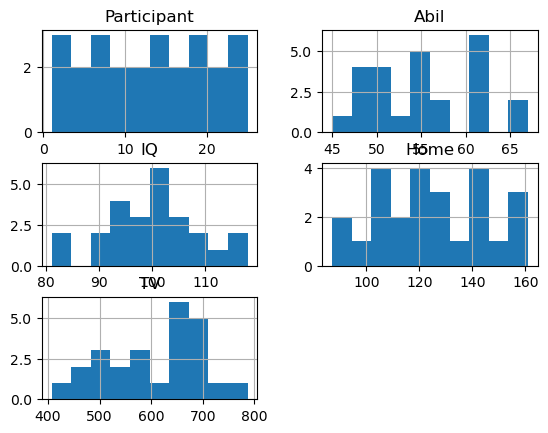

In [12]:
# Q1c (code):
# Check data distribution
df_mh.hist()

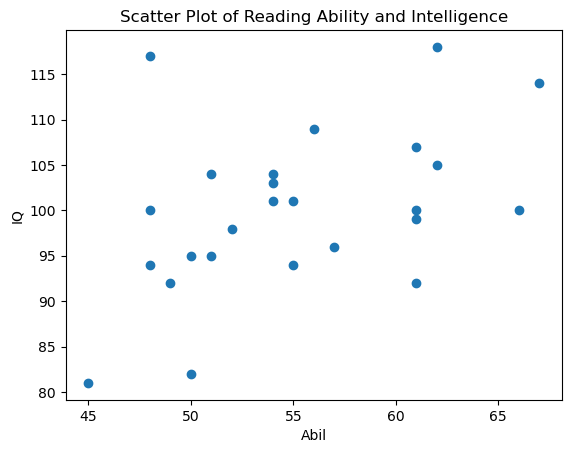

In [27]:
# Q1d (code):
# Scatter plot
plt.scatter(df_mh['Abil'],df_mh['IQ'])
plt.xlabel('Abil')
plt.ylabel('IQ')
plt.title('Scatter Plot of Reading Ability and Intelligence')
plt.show()

Text(0.5, 1.0, 'Scatter Plot of Reading Ability and Intelligence with Correlation Line')

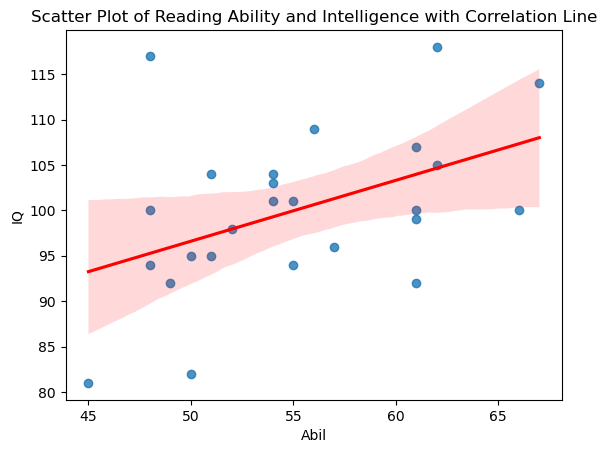

In [42]:
# Q1e (code):
# Correlation line
#Using regplot to generate the correlation line and specifying a distinct color to enhance visibility
sns.regplot(x='Abil', y='IQ', data=df_mh, line_kws={'color': 'red'})
plt.title('Scatter Plot of Reading Ability and Intelligence with Correlation Line')

**Question 2**:

a. Which correlation coefficient test can we use, Pearson or Spearman? Briefly explian why based on the results of Question 1.

b. Conduct a correlation coefficient test.

c. Interpret the result (direction and strength of the association between the two varibles)

**<span style="color: green;">#Q2a (answer with words):   
#Answer:</span>**   
    #The scatter plot results in Question 1 shows a linear relationship between the variables.  
    #The Pearson correlation test is preferred.

In [35]:
# Q2b (code):
corr_result = pg.corr(x=df_mh['Abil'], y=df_mh['IQ'])
print(corr_result)

          n        r         CI95%     p-val   BF10     power
pearson  25  0.45117  [0.07, 0.72]  0.023593  2.804  0.640299


<span style="color: green;">#**Q2c (answer with words):  
#Answer**:</span>  

n = is the sample size. 25 samples are analyzed.

r = is the correlation coefficient. The positive correlation coefficient (r = 0.45117) indicates a positive linear relationship between the variables.  


CI95% = are the 95% confidence intervals around the correlation coefficient.

p-val = is the p-value of the test. The p-value 0.023593 is less than the common significance level of 0.05, suggesting that there is evidence to reject the null hypothesis of no correlation.   

BF10 = is the Bayes Factor of the test, which also measure the statistical significance of the test. BF10 = 2.804, which suggests some evidence in favor of the alternative hypothesis.

power = is the achieved power of the test, which is the likelihood that we will detect an effect when there is indeed an effect there to be detected. power = 0.640299, suggesting a relatively good chance of detecting a true effect if it exists.

## Task 2. Chi-square Test
We will continue to use the data example from Task 1.

We want to explore whether there are significant differences in the amount of time spent reading at home per week (Home) among people with different reading abilities (Reading Ability). Therefore, we will divide the reading ability of all participants into two groups. The first group is those with low reading ability (Reading Ability at or below the rounded average), and the second group is those with high reading ability (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Abil".


Similarly, the reading time is divided into two different scenarios: the first scenario is infrequent reading (Home at or below the rounded average), and the other is frequent reading (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Home".


Then, construct a Contingency Matrix and perform a Chi-square test.

**Question 3**:

a. Please state the null hypothesis (H0) and alternative hypothesis (H1) for this Chi-square test.

b. Based on the task description, add new columns “Rank_Abil” and "Rank_Home" to the dataframe df_mh.

c. Construct a Contingency Matrix.

d. Perform a Chi-square test.

e. Interpret the results of the Chi-square test (answer in text).

<span style="color: green;">**#Q3a (answer in words):**</span>  

H0: There is no association between reading ability (low/high) and the amount of time spent reading at home(infrequent/frequent).

H1: There is an association between reading ability (low/high) and the amount of time spent reading at home(infrequent/frequent).

In [40]:
# Q3b (code):
# Import necessary libraries
import pandas as pd  ##used for wrangling
from scipy.stats import chi2_contingency ##used for performing the chi-square test of independence

# Define the rounded average for Reading Ability and Home
rounded_avg_Abil = round(df_mh['Abil'].mean())
rounded_avg_home = round(df_mh['Home'].mean())

# Create the Rank_Abil column
df_mh['Rank_Abil'] = pd.cut(df_mh['Abil'], bins=[-float('inf'), rounded_avg_Abil, float('inf')], labels=['Low', 'High'])


# Create the Rank_Home column
df_mh['Rank_Home'] = pd.cut(df_mh['Home'], bins=[-float('inf'), rounded_avg_home, float('inf')], labels=['Infrequent', 'Frequent'])

In [48]:
# Q3c (code):
# Construct Contingency Matrix
contingency_matrix = pd.crosstab(df_mh['Rank_Abil'], df_mh['Rank_Home'])
print('Contingency Matrix:')
print(contingency_matrix)

Contingency Matrix:
Rank_Home  Infrequent  Frequent
Rank_Abil                      
Low                12         3
High                2         8


In [60]:
# Q3d (code):
# Perform the Chi-square test
result = chi2_contingency(contingency_matrix)
# show the Chi-square Statistic
chi2 = result.statistic
# show the Pvalue
p_value = result.pvalue
print('Chi-square Test Result:')
print('Chi-square Statistic:', chi2)
print('P-value:',p_value)

Chi-square Test Result:
Chi-square Statistic: 6.500270562770561
P-value: 0.010785807794066234


<span style="color: green;">#**Q3e (answer with words):  
Answer**:</span>  

The chi-square statistic (6.500) is a measure of the difference between the observed and expected frequencies in the contingency table.  
The p-value associated with the test is 0.0108, which is less than the commonly chosen significance level of 0.05.  
The null hypothesis (H0) is rejected.  
There is sufficient evidence to suggest that there is an association between reading ability and the amount of time spent reading at home.

## Task 3. Two-sample t-test
As we discussed on Week 3, Two-sample designs are very useful when we want to know whether there is a difference between groups on a particular variable.

In this assignment, you will be guided to replicate the Experiment 4 (p. 887-888) from the paper below, focusing on understanding the data through descriptive statistics, visualizing distributions, testing assumptions (normality and variance homogeneity), and finally performing the independent t-test.

Schroeder, J. and Epley, N. (2015). The sound of intellect: Speech reveals a thoughtful mind, increasing a job candidate's appeal. Psychological Science, 26, 277--891.


As we explained during Week 3 lecture, there are different types of two-sample designs depending on whether or not the two groups are independent (e.g., different participants in different conditions) or not (e.g., same participants in different conditions). In this course we focus on independent samples, which typically means that the observations in the two groups are unrelated - usually meaning different people. But in real practice you will need to go through similar procedures to determine which is the proper statistical test to use.




### Background of data: Speech as indicator of intellect
To recap on Experiment 4, 39 professional recruiters from Fortune 500 companies evaluated job pitches of M.B.A. candidates (Masters in Business Administration) from the University of Chicago Booth School of Business. The methods and results appear on pages 887--889 of the article if you want to look at them specifically for more details.

###Step 1: Analyze the demographics of evaluators from the provided dataset

**Instructions:**

1. Load the necessary libraries (pandas, scipy, numpy, matplotlib.pyplot, seaborn) and explain why you need them ("#used for ...").

2. Read the evaluators.csv file into a DataFrame.

3. Calculate the mean and standard deviation of the age of the evaluators, handling missing values appropriately.

4. Count how many male and female evaluators were in the study.

**Question 4:**

a. What was the mean age of the evaluators?
What was the standard deviation of the age of the evaluators?

b. How many participants were female and how many participants were male?


In [61]:
import pandas as pd # used for data wrangling and analysis
from scipy import stats #used for statistical analysis
import numpy as np #used for numerical computing
import matplotlib.pyplot as plt #used for data visualization
import seaborn as sns #used for data visualization and statistical graphics

# Load the data
# Relative path to read this CSV file from within the zip file provided to students
df_evaluators = pd.read_csv('data for A1/evaluators.csv')
df_evaluators.head()

,eval_id,condition,age,sex
0,1,listened,29.0,2.0
1,2,listened,27.0,2.0
2,3,listened,27.0,2.0
3,4,read,40.0,2.0
4,5,read,32.0,2.0


In [123]:
#Check missing value
df_evaluators.isnull().sum()

eval_id      0
condition    0
age          5
sex          5
dtype: int64

In [124]:
#Drop missing value
df_evaluators.dropna(inplace=True)

In [126]:
#Re-check missing value
df_evaluators.isnull().sum()

eval_id      0
condition    0
age          0
sex          0
dtype: int64

In [127]:
# Q4a (code):
# Calculate mean and standard deviation for age
age_mean = df_evaluators['age'].mean()
age_std = df_evaluators['age'].std()
print('Mean for Age:',age_mean)
print('Standard Deviation:',age_std)

Mean for Age: 30.852941176470587
Standard Deviation: 6.238358141327351


In [128]:
# Q4b (code)
# Count male and female evaluators
# In the 'sex' column: 1 represents males and 2 represents females
# Replace '1'&'2' with 'Male'&'Female' for readability
gender_count = df_evaluators['sex'].replace({1.0: 'Male', 2.0: 'Female'}).value_counts()
print(gender_count)

Female    30
Male       4
Name: sex, dtype: int64


###Step 2: Calculate overall intellect ratings from evaluators and prepare a combined dataset for analysis

We are now going to calculate an overall intellect rating given by each evaluator. To break that down a bit, we are going to calculate how intellectual the evaluators (the raters) thought candidates were overall, depending on whether the evaluators read or listened to the candidates' resume pitches. This is calculated by averaging the ratings of competent, thoughtful and intelligent for each evaluator held within ratings.csv.

Note: We are not looking at ratings to individual candidates; we are looking at overall ratings for each evaluator. This is a bit confusing but makes sense if you stop to think about it a little. You can think about it in terms of "do raters rate differently depending on whether they read or listen to a resume pitch".
We will then combine the overall intellect rating with the overall impression ratings and overall hire ratings for each evaluator, all ready found in ratings.csv. In the end we will have a new new dataframe named "ratings2" - which has the below structure:

**eval_id** shows the evaluator ID. Each evaluator has a different ID. So all the 1's are the same evaluator.

**Category** shows the scale that they were rating on - intellect, hire, impression

**Rating** shows the overall rating given by that evaluator on a given scale.

**condition** shows whether that evaluator listened to (e.g., evaluators 1, 2 and 3), or read (e.g., evaluator 4) the resume.


**Instructions:**

1. Load the ratings.csv file.

2. Filter and calculate the mean intellect rating for each evaluator.

3. Combine this with overall impression and hire ratings to create a new DataFrame named "rating2".

4. Merge this DataFrame with the evaluator demographics.

**Question 5**:

Print the head of "rating2".


In [129]:
# Load ratings data
df_ratings = pd.read_csv('data for A1/ratings.csv')
df_ratings.head()

,eval_id,Category,Rating
0,1,competent,6.0
1,1,thoughtful,6.0
2,1,intelligent,6.0
3,1,impression,7.0
4,1,hire,6.0


In [130]:
# Q5 (code):
# Filter the ratings DataFrame to include only 'thoughtful', 'competent', and 'intelligent' categories
filtered_ratings = df_ratings[df_ratings['Category'].isin(['thoughtful', 'competent', 'intelligent'])]

# Calculate the mean intellect rating for each evaluator
# Group by 'eval_id' and calculate mean, then reset the index to convert groupby object back to DataFrame
mean_intellect_ratings = df_ratings[df_ratings['Category'] == 'intelligent'].groupby('eval_id')['Rating'].mean().reset_index()

# Add a 'Category' column with the value 'intellect' for these rows
mean_intellect_ratings['Category'] = 'intelligent'

mean_intellect_ratings.head()
# Create a DataFrame for 'impression' and 'hire' ratings
other_ratings = df_ratings[df_ratings['Category'].isin(['impression', 'hire'])]

# Combine the DataFrames to create 'ratings2'
# Concatenate the 'intellect_mean' DataFrame with the 'other_ratings' DataFrame
ratings2 = pd.concat([mean_intellect_ratings, other_ratings])

# Join 'ratings2' with the 'df_evaluators' DataFrame to add the 'condition' column
ratings2 = pd.merge(ratings2, df_evaluators, on='eval_id')

# Select only the necessary columns as per the structure required
ratings2 = ratings2[['eval_id', 'condition', 'Category', 'Rating']]

# Arrange by 'eval_id' and 'Category'
ratings2.sort_values(by=['eval_id', 'Category'], inplace=True)

# Display the first few rows of the final 'ratings2' DataFrame to verify
ratings2.head()

,eval_id,condition,Category,Rating
2,1,listened,hire,6.000000
1,1,listened,impression,7.000000
0,1,listened,intelligent,6.000000
5,2,listened,hire,4.000000
4,2,listened,impression,4.666667


###Step 3: Perform descriptive and inferential statistical analyses, including testing assumptions and conducting independent t-tests.

We are going to run the t-tests for Intellect, Hire and Impression; each time comparing evaluators overall ratings for the listened group versus overall ratings for the read group to see if there was a significant difference between the two conditions: i.e., did the evaluators who listened to pitches give a significant higher or lower rating than evaluators that read pitches?

**Question 6**:

a. In terms of hypotheses, how can we phrase the hypothesis?

b. Which t-test should we choose, one-tail or two-tail? And explian why.

c. What are the independent variable and the dependent variable here?



<span style="color: green;">#**Q6a (answer with words):  
#Answer**:</span>  
#Null hypothesis:  
There is no significant difference in overall ratings between the listened group and the read group for Intellect, Hire, and Impression（μ1=μ2）.  
#Alternative hypothesis:  
There is a significant difference in overall ratings between the listened group and the read group for Intellect, Hire, and Impression（μ1≠μ2).

#we could phrase the null hypothesis for these tests as there is no significant difference between overall ratings on the {insert trait} scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H0:μ1=μ2). Alternatively, we could state it as there will be a significant difference between overall ratings on the {insert trait} scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H1:μ1≠μ2).

<span style="color: green;">#**#Q6b (answer in words):  
#Answer**</span>  
#Which t-test should we choose, one-tail or two-tail? Explain why.  
Since we are interested in whether there is any significant difference in overall ratings, and we don't have a specific hypothesis about the direction of the difference, a two-tailed test is more suitable.Using one-tail t-test can lead to the consequences of missing an effect in the other direction.

<span style="color: green;">#**#Q6c (answer in words):  
#Answer**</span>  
#What are the independent variable and the dependent variable here?  
Independent Variable: The method of pitch delivery, which are 'the listened group' and 'the read group'.  
Dependent Variable: The overall ratings for 'Intellect', 'Hire', and 'Impression' given by the evaluators.


To clarify, we are going to run three between-subjects t-tests in total; one for intellect ratings; one for hire ratings; one for impression ratings.

**Instructions:**

1. Descriptive analysis of the ratings.

2. Test for normal distribution (Shapiro-Wilk test) and homogeneity of variances (Levene's test) for the intellect, impression, and hire ratings.

3. Conduct independent t-tests comparing intellect, impression, and hire ratings between conditions (listened vs. read).

Hints: three T-tests need to be performed.

**Question 7**:

a: Print the test results.

b: Interpret the results of the above descriptive statistics, Shapiro-Wilk test, Levene's test, and independent t-tests. Explian why we use these tests and how we made our decisions based on the test result.

In [131]:
##Q7a (code):
from scipy.stats import shapiro, levene, ttest_ind # used for statistical analyses (Shapiro-Wilk test, Levene's test, independent two-sample t-test)

# Descriptive analysis of the ratings
ratings_desc = ratings2.groupby(['condition', 'Category'])['Rating'].describe()

# Test for normal distribution (Shapiro-Wilk test)
shapiro_results = ratings2.groupby('Category')['Rating'].apply(shapiro)

# Test for homogeneity of variances (Levene's test)
levene_stat, levene_p_value = levene(
    ratings2[ratings2['Category'] == 'intelligent']['Rating'],
    ratings2[ratings2['Category'] == 'impression']['Rating'],
    ratings2[ratings2['Category'] == 'hire']['Rating'])
levene_results = {"statistic": levene_stat, "p-value": levene_p_value}

# Independent t-tests
#T-tests of 'intelligent'
listen_intelligent = ratings2[(ratings2['condition'] == 'listened') & (ratings2['Category'] == 'intelligent')]['Rating']
read_intelligent = ratings2[(ratings2['condition'] == 'read') & (ratings2['Category'] == 'intelligent')]['Rating']
#T-tests of 'impression'
listen_impression = ratings2[(ratings2['condition'] == 'listened') & (ratings2['Category'] == 'impression')]['Rating']
read_impression = ratings2[(ratings2['condition'] == 'read') & (ratings2['Category'] == 'impression')]['Rating']
#T-tests of 'hire'
listen_hire = ratings2[(ratings2['condition'] == 'listened') & (ratings2['Category'] == 'hire')]['Rating']
read_hire = ratings2[(ratings2['condition'] == 'read') & (ratings2['Category'] == 'hire')]['Rating']

ttest_intelligent = ttest_ind(listen_intelligent, read_intelligent)
ttest_impression = ttest_ind(listen_impression, read_impression)
ttest_hire = ttest_ind(listen_hire, read_hire)

ttest_results = {
    "Intelligent": {"t-statistic": ttest_intelligent.statistic, "p-value": ttest_intelligent.pvalue},
    "Impression": {"t-statistic": ttest_impression.statistic, "p-value": ttest_impression.pvalue},
    "Hire": {"t-statistic": ttest_hire.statistic, "p-value": ttest_hire.pvalue}}


print('ratings desc')
print(ratings_desc)
print('shapiro results')
print(shapiro_results)
print('levene results') 
print(levene_results) 
print('ttest results')
print(ttest_results)

ratings desc
                       count      mean       std       min       25%  \
condition Category                                                     
listened  hire          18.0  5.000000  2.142017  1.000000  4.000000   
          impression    18.0  5.833333  2.026781  2.333333  4.416667   
          intelligent   18.0  5.555556  1.503808  3.000000  5.000000   
read      hire          16.0  2.625000  2.028957  0.000000  1.000000   
          impression    16.0  3.770833  2.176367  0.333333  1.916667   
          intelligent   16.0  3.125000  2.156386  0.000000  2.000000   

                            50%       75%       max  
condition Category                                   
listened  hire         5.000000  7.000000  8.000000  
          impression   6.166667  7.333333  8.666667  
          intelligent  5.000000  6.000000  9.000000  
read      hire         2.000000  3.250000  7.000000  
          impression   4.166667  5.333333  7.333333  
          intelligent  3.000000 

<span style="color: green;">#**#Q7b (answer in words):**</span> 

ratings desc: It provides a comprehensive overview of statistics and characteristics of data. We can see evalutors tend to give higher ratings when the evaluators listened to the candidates' resume pitches than read.

shapiro results: We used this to check whether the ratings within each category and condition are normally distributed. The p-value of 'hire' ratings is less than 0.05, so the hypothesis of normality is rejected. And p-value of 'impression' and 'intelligent' ratings are more than 0.05, especially 'impression' ratings, which suggests they are more likely to be normally distributed.

levene results: It is crucial to check whether the variances of ratings are consistent across these conditions before performing the independent t-tests. This is no significant evidence to prove the ratings vary in the listened group and the read group.

t-test: The t-test is used to assess whether there is a statistically significant difference between the means of two groups. For 'hire', 'impression' and 'intelligent', the p-values are all below 0.05, which suggests the result is said to be statistically significant. This shows that how the candidates deliver resumes has a significant impact on the ratings evaluators give.

In conclusion, evaluators consistently assign higher ratings to candidates when they listen to resume pitches rather than reading them. This underscores the pivotal role of self-introduction in interviews, emphasizing the importance for both interviewees and interviewers to leverage this influence for more effective interactions.